<h1><span style="color: #6495ED;">Air Quality Prediction</span></h1>

<h2><span style="color: #6495ED;">Exploratory Data Analysis (EDA) and Baseline Modeling</span></h2>

Prepared by Lipsita Tripathy

Email: lipsitalt@gmail.com

December 2023

| <h2><span style="color: #FF6F61;">Table of Contents</span></h2> |
|----------------------------------------------|
| Introduction                                 |
| Dataset Overview and Preprocessing           |
| Exploratory Data Analysis (EDA)               |
| Baseline Models and Evaluation Metrics        |
| Next Steps                                   |

## Data Dictionary
The project utilizes air quality data extracted from 20 stations in Delhi for the years 2018 and 2019. The dataset comprises 12 features with instances recorded at each station.
| **Features**              | **Description**                                             | **Type**   |
|---------------------------|-------------------------------------------------------------|------------|
| Datetime                  | Timestamp indicating the date and time of the recorded data | -          |
| StationId                 | Unique identifier for each monitoring station               | Numeric    |
| PM2.5 (ug/m3)             | Particulate Matter with a diameter of 2.5 microns or less   | Numeric    |
| PM10 (ug/m3)              | Particulate Matter with a diameter of 10 microns or less   | Numeric    |
| NO (ug/m3)                | Nitric Oxide concentration                                  | Numeric    |
| NO2 (ug/m3)               | Nitrogen Dioxide concentration                               | Numeric    |
| NOx (ug/m3)               | Sum of Nitric Oxide and Nitrogen Dioxide concentrations     | Numeric    |
| NH3 (ug/m3)               | Ammonia concentration                                       | Numeric    |
| SO2 (ug/m3)               | Sulfur Dioxide concentration                                | Numeric    |
| CO (ug/m3)                | Carbon Monoxide concentration                               | Numeric    |
| Ozone (ug/m3)             | Ozone concentration                                         | Numeric    |
| Benzene (ug/m3)           | Concentration of Benzene in the air                          | Numeric    |
| Toluene (ug/m3)           | Concentration of Toluene in the air                          | Numeric    |
| RH (%)                    | Relative Humidity in percentage                             | Numeric    |
| WS (m/s)                  | Wind Speed in meters per second                              | Numeric    |
| WD (degree)               | Wind Direction in degrees                                   | Numeric    |
| BP (mmHg)                 | Barometric Pressure in millimeters of mercury               | Numeric    |
| AT (degree C)             | Ambient Temperature in degrees Celsius                      | Numeric    |
| RF (mm)                   | Rainfall in millimeters                                     | Numeric    |
| SR (W/mt2)                | Solar Radiation in Watts per square meter                    | Numeric    |
| Xylene (ug/m3)           | Concentration of Xylene in the air                            | Numeric    |


| **Trget**              | **Description**                                             | **Type**   |
|---------------------------|-------------------------------------------------------------|------------|
| y_AQI                     | Target variable representing the predicted Air Quality Index for next 24 hours| Numeric    |
| y_AQI_diff                | Target variable representing the differentiated predicted Air Quality Index for next 24 hours| Numeric    |

## Introduction

As we delve into Sprint 2 of our Air Quality Prediction project, let's reflect on the journey we began in Sprint 1. In the initial phase, we illuminated the critical issue of air pollution in Delhi, setting the stage for a comprehensive data-driven solution. Our objective is clear: harness the power of data science and machine learning to predict air quality, providing invaluable insights for decision-makers and contributing to a healthier future.

### Contextualizing the Problem

In Sprint 1, we painted a vivid picture of the air quality challenges faced by the residents of Delhi. The city's iconic landmarks, shrouded in haze, tell a tale of persistent air pollution. The detrimental impact on health, equivalent to smoking 44 cigarettes a day, demands urgent attention. Clean air, a fundamental necessity, is compromised, influencing life expectancy and overall well-being.

### Unraveling Data Complexity

Our dataset, a treasure trove of hourly pollution and weather measurements from 25 monitoring stations in Delhi, presented both challenges and opportunities. Focused on the temporal aspect, we filtered and processed the data, addressing missing values and ensuring the integrity of time series information. We navigated through the intricacies of AQI calculation, ensuring precision in our understanding of air quality.

### Sprint 2 Objectives:

#### Advanced Preprocessing

In Sprint 2, our journey continues with a meticulous focus on advanced preprocessing. We recognize the importance of refining our dataset, tackling additional preprocessing concerns, baseline modeling and ensuring it's primed for sophisticated modeling.

#### Comprehensive EDA

Exploratory Data Analysis (EDA) takes center stage as we embark on a deeper investigation. Our goal is to uncover intricate patterns, correlations, trends, and hidden insights that will guide us in making informed decisions during the modeling phase.

#### Baseline Modeling

With a strong foundation laid in Sprint 1, we transition to baseline modeling. Linear regression becomes our initial benchmark, followed by Decision Tree providing a baseline for assessing the performance of future, more complex models.

#### Evaluation Framework

We introduce a robust evaluation framework aligned with the practical use case of our models. This framework ensures meaningful assessments and guides our iterative model improvement process.

Through these efforts, we aim not only to predict air quality accurately but also to contribute to a future where clean air is a reality for everyone in Delhi.


*************************************************************************************

# 2. Data Exploration

*************************************************************************************

* data_exploration.ipynb

In [1]:

import os
import calendar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

### Loading the Dataset

Let's start by loading the dataset to see what our data looks like.

In [2]:
df = pd.read_csv('data/generated/delhi_AQI_hourly.csv')
df.head()

,Datetime,AQI,PM2.5 (ug/m3),PM10 (ug/m3),NOx (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (ug/m3),Ozone (ug/m3),Xylene (ug/m3),RH (%),WS (m/s),WD (degree),BP (mmHg),AT (degree C),RF (mm),SR (W/mt2)
0,2012-11-28 00:00:00,325.0,202.611667,283.84,350.613333,84.792500,11.021250,5.645000,5.956667,18.153333,58.237143,0.323333,155.900000,877.170000,11.155000,0.0,69.714286
1,2012-11-28 01:00:00,325.0,198.305833,283.84,347.215417,87.301250,11.515000,7.225833,6.246667,16.845000,59.100000,0.340000,128.055000,864.650714,10.866250,0.0,69.716429
2,2012-11-28 02:00:00,325.0,196.347222,283.84,321.686111,90.343333,12.421250,7.095556,6.554444,15.416667,59.288095,0.346667,139.063333,860.452857,10.707500,0.0,71.843333
3,2012-11-28 03:00:00,325.0,199.490556,283.84,283.800000,92.244167,18.287917,6.702222,6.793175,12.720000,57.152381,0.361667,146.500000,852.305714,10.390833,0.0,72.253333
4,2012-11-28 04:00:00,325.0,199.083333,283.84,223.706167,88.356667,21.301296,7.091333,6.695119,10.306667,54.854762,0.394683,150.603333,852.278571,10.230000,0.0,71.865238


## Feature Engineering
Feature engineering is like preparing the ingredients for a recipe. In air quality prediction, it means creating special features that help our model make better predictions. We're basically selecting and transforming the data in a way that makes it easier for the model to understand and make accurate predictions about air quality.

### Key Feature Engineering Steps:

1. **Datetime Processing:**
   - Conversion of the 'Datetime' column to a datetime object.
   - Sorting the DataFrame by 'StationId' and 'Datetime' for consistent calculations across stations.
   - Extracting year, month, day of the week, and hour of the day information.

2. **Volatility and Moving Averages:**
   - Calculation of volatilities (standard deviations) for daily, weekly, and monthly rolling windows per station.
   - Computation of moving averages for the last 7 and 30 days.

3. **Next 24-Hour AQI (y_AQI):**
   - Creating a column ('y_AQI') representing the AQI values shifted 24 hours into the future. This serves as the **target variable** for prediction.

### Rationale for Feature Engineering:

- **Temporal Patterns:** Extracting year, month, day of the week, and hour of the day helps the model capture temporal patterns and seasonality in air quality.

- **Volatility and Averages:** Volatility measures and moving averages provide insights into the stability and trends in air quality over different time spans.

- **Prediction Target ('y_AQI'):** The 'y_AQI' column is created to represent the AQI values in the next 24 hours, enabling the model to learn from past data for future predictions.

These engineered features aim to enhance the model's ability to understand and predict air quality dynamics effectively.


In [3]:
# Convert the 'Datetime' column to a pandas datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the DataFrame by 'Datetime' to apply rolling window across stations
df = df.sort_values(by=['Datetime'])

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Extract Year from the 'Datetime' column
df['Year'] = df['Datetime'].dt.year

# Extract Month from the 'Datetime' column
df['Month'] = df['Datetime'].dt.month

# Extract DayOfWeek from the 'Datetime' column
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

# Extract HourOfDay from the 'Datetime' column
df['HourOfDay'] = df['Datetime'].dt.hour

# Calculate volatilities for daily, weekly, and monthly rolling windows per station
df['Volatility_Last_24hr'] = df['AQI'].rolling(window=24).std().reset_index(level=0, drop=True)
df['Volatility_Last_7d'] = df['AQI'].rolling(window=24 * 7).std().reset_index(level=0, drop=True)
df['Volatility_Last_30d'] = df['AQI'].rolling(window=24 * 30).std().reset_index(level=0, drop=True)

# Calculate moving averages for the last 7 and 30 days
df['MA_Last_7d'] = df['AQI'].rolling(window=24 * 7).mean().reset_index(level=0, drop=True)
df['MA_Last_30d'] = df['AQI'].rolling(window=24 * 30).mean().reset_index(level=0, drop=True)

# Next 24 hour AQI (the 'y' variable)
df['y_AQI'] = df['AQI'].shift(periods=-24)
df = df.dropna(subset=['y_AQI'])

df.head()

,Datetime,AQI,PM2.5 (ug/m3),PM10 (ug/m3),NOx (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (ug/m3),Ozone (ug/m3),Xylene (ug/m3),...,Year,Month,DayOfWeek,HourOfDay,Volatility_Last_24hr,Volatility_Last_7d,Volatility_Last_30d,MA_Last_7d,MA_Last_30d,y_AQI
0,2012-11-28 00:00:00,325.0,202.611667,283.84,350.613333,84.792500,11.021250,5.645000,5.956667,18.153333,...,2012,11,2,0,NaN,NaN,NaN,NaN,NaN,338.0
1,2012-11-28 01:00:00,325.0,198.305833,283.84,347.215417,87.301250,11.515000,7.225833,6.246667,16.845000,...,2012,11,2,1,NaN,NaN,NaN,NaN,NaN,341.0
2,2012-11-28 02:00:00,325.0,196.347222,283.84,321.686111,90.343333,12.421250,7.095556,6.554444,15.416667,...,2012,11,2,2,NaN,NaN,NaN,NaN,NaN,344.0
3,2012-11-28 03:00:00,325.0,199.490556,283.84,283.800000,92.244167,18.287917,6.702222,6.793175,12.720000,...,2012,11,2,3,NaN,NaN,NaN,NaN,NaN,345.0
4,2012-11-28 04:00:00,325.0,199.083333,283.84,223.706167,88.356667,21.301296,7.091333,6.695119,10.306667,...,2012,11,2,4,NaN,NaN,NaN,NaN,NaN,347.0


## Extracting Lagged Values for Time Series Forecasting

In time series forecasting, the inclusion of lagged values is crucial for capturing temporal patterns, dependencies, and short-term fluctuations in the data. Lagged values represent historical observations of the target variable at different time points.

### Why Extract Lagged Values?

1. **Temporal Dependencies:** Lagged values help the model understand how the current state of the target variable is related to its past states. This is essential for capturing the temporal dependencies inherent in time series data.

2. **Short-Term Patterns:** While moving averages provide a smoothed trend, lagged values allow the model to capture short-term patterns and rapid changes in the data.

3. **Non-Linear Relationships:** Lagged values can reveal non-linear relationships between the target variable and its past values, which may not be adequately represented by moving averages alone.

For the lagged values, we calculate over the "AQI" column. This can provide our time series forecasting model with additional temporal information about the historical patterns of this feature..


In [4]:
# We select the 'AQI' column as the feature for which we want to calculate lagged values.
lagged_feature = 'AQI'

# We define the lag periods, which represent the number of time units to shift the observations. In this case, we use lag periods of 24 hours, 48 hours, and 7 days.
# For each lag period, we create new columns with names like 'AQI_lag_24', 'AQI_lag_48', and 'AQI_lag_168' (representing 7 days).
for i in [24, 48, 7 * 24]:
    df[f'{lagged_feature}_lag_{i}hr'] = df[lagged_feature].shift(i)

# sanity check
df.head()

,Datetime,AQI,PM2.5 (ug/m3),PM10 (ug/m3),NOx (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (ug/m3),Ozone (ug/m3),Xylene (ug/m3),...,HourOfDay,Volatility_Last_24hr,Volatility_Last_7d,Volatility_Last_30d,MA_Last_7d,MA_Last_30d,y_AQI,AQI_lag_24hr,AQI_lag_48hr,AQI_lag_168hr
0,2012-11-28 00:00:00,325.0,202.611667,283.84,350.613333,84.792500,11.021250,5.645000,5.956667,18.153333,...,0,NaN,NaN,NaN,NaN,NaN,338.0,NaN,NaN,NaN
1,2012-11-28 01:00:00,325.0,198.305833,283.84,347.215417,87.301250,11.515000,7.225833,6.246667,16.845000,...,1,NaN,NaN,NaN,NaN,NaN,341.0,NaN,NaN,NaN
2,2012-11-28 02:00:00,325.0,196.347222,283.84,321.686111,90.343333,12.421250,7.095556,6.554444,15.416667,...,2,NaN,NaN,NaN,NaN,NaN,344.0,NaN,NaN,NaN
3,2012-11-28 03:00:00,325.0,199.490556,283.84,283.800000,92.244167,18.287917,6.702222,6.793175,12.720000,...,3,NaN,NaN,NaN,NaN,NaN,345.0,NaN,NaN,NaN
4,2012-11-28 04:00:00,325.0,199.083333,283.84,223.706167,88.356667,21.301296,7.091333,6.695119,10.306667,...,4,NaN,NaN,NaN,NaN,NaN,347.0,NaN,NaN,NaN


### AQI Categories Assignment
The code snippet below is dedicated to categorizing Air Quality Index (AQI) values into different predefined categories. The AQI is a numerical scale that represents the level of air pollution and its potential impact on health. The categories provide a qualitative description of the air quality.

#### Steps:
1. **Function Definition:**
   - The `get_AQI_bucket` function is defined, which takes an AQI value (`x`) as input and returns the corresponding category.

2. **Categorization Rules:**
   - The function uses specific ranges to categorize AQI values into different buckets:
      - "Good": AQI <= 50
      - "Satisfactory": 50 < AQI <= 100
      - "Moderate": 100 < AQI <= 200
      - "Poor": 200 < AQI <= 300
      - "Very Poor": 300 < AQI <= 400
      - "Severe": AQI > 400

3. **Application to DataFrame:**
   - The `apply` method is used on the 'AQI' column of the DataFrame (`df`) to assign each AQI value its corresponding category.
   - The results are stored in a new column named 'AQI_Category' in the DataFrame.

#### Purpose:
Assigning AQI categories helps in providing a qualitative assessment of air quality, making it easier to communicate the potential health risks associated with different pollution levels. This categorization is often used for public awareness and regulatory purposes.

In [5]:
## AQI Categories
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["AQI_Category"] = df["AQI"].apply(lambda x: get_AQI_bucket(x))

# display the first few rows of the DataFrame, showing the original AQI values along with their assigned categories.
df.head()

,Datetime,AQI,PM2.5 (ug/m3),PM10 (ug/m3),NOx (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (ug/m3),Ozone (ug/m3),Xylene (ug/m3),...,Volatility_Last_24hr,Volatility_Last_7d,Volatility_Last_30d,MA_Last_7d,MA_Last_30d,y_AQI,AQI_lag_24hr,AQI_lag_48hr,AQI_lag_168hr,AQI_Category
0,2012-11-28 00:00:00,325.0,202.611667,283.84,350.613333,84.792500,11.021250,5.645000,5.956667,18.153333,...,NaN,NaN,NaN,NaN,NaN,338.0,NaN,NaN,NaN,Very Poor
1,2012-11-28 01:00:00,325.0,198.305833,283.84,347.215417,87.301250,11.515000,7.225833,6.246667,16.845000,...,NaN,NaN,NaN,NaN,NaN,341.0,NaN,NaN,NaN,Very Poor
2,2012-11-28 02:00:00,325.0,196.347222,283.84,321.686111,90.343333,12.421250,7.095556,6.554444,15.416667,...,NaN,NaN,NaN,NaN,NaN,344.0,NaN,NaN,NaN,Very Poor
3,2012-11-28 03:00:00,325.0,199.490556,283.84,283.800000,92.244167,18.287917,6.702222,6.793175,12.720000,...,NaN,NaN,NaN,NaN,NaN,345.0,NaN,NaN,NaN,Very Poor
4,2012-11-28 04:00:00,325.0,199.083333,283.84,223.706167,88.356667,21.301296,7.091333,6.695119,10.306667,...,NaN,NaN,NaN,NaN,NaN,347.0,NaN,NaN,NaN,Very Poor


## Data Filtering and Sorting

Here, we filter the records to keep data only from January 1, 2021, onward, to focus on post-pandemic air quality trends. Additionally, we sort the DataFrame based on 'Datetime' and 'StationId' to prepare the data for applying rolling windows across stations.

### Reason for Including Data from November 2020 at the beginning:
While calculating volatility, moving averages, and lagged values, it's essential to keep a buffer period to avoid null values at the beginning of the dataset. By including data from November 2020, we ensure that these calculations have sufficient historical data, minimizing the need to handle null values later in the analysis.

### Reason for Limiting Data Post-2021:
Considering the impact of the pandemic on air quality, restricting the analysis to data from 2021 onward allows for a more accurate understanding of the overall air pollution trend in Delhi. During lockdowns, people predominantly stayed home, influencing air quality readings and potentially skewing the data. Therefore, focusing on post-pandemic data provides a clearer representation of the usual air pollution patterns.

In [6]:
# Filter records before "2021-01-01"
df = df[df['Datetime'] >= "2013-01-01"]

# Sort the DataFrame by 'Datetime' to apply rolling window across stations
df = df.sort_values(by=['Datetime'])

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

df.head()

,Datetime,AQI,PM2.5 (ug/m3),PM10 (ug/m3),NOx (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (ug/m3),Ozone (ug/m3),Xylene (ug/m3),...,Volatility_Last_24hr,Volatility_Last_7d,Volatility_Last_30d,MA_Last_7d,MA_Last_30d,y_AQI,AQI_lag_24hr,AQI_lag_48hr,AQI_lag_168hr,AQI_Category
0,2013-01-01 00:00:00,354.0,290.774583,292.631667,117.224563,75.685556,9.992130,5.052250,13.794630,0.0,...,8.307496,29.124119,61.729239,380.964286,332.893056,389.0,340.0,387.0,434.0,Very Poor
1,2013-01-01 01:00:00,358.0,275.749821,296.150000,88.122976,66.740556,9.477546,7.665310,9.977963,0.0,...,9.525614,28.895636,61.732289,380.517857,332.954167,389.0,337.0,389.0,433.0,Very Poor
2,2013-01-01 02:00:00,362.0,271.463472,309.030000,61.464690,57.030556,9.207963,10.777421,7.316574,0.0,...,10.882691,28.663239,61.739243,380.107143,333.015278,386.0,334.0,391.0,431.0,Very Poor
3,2013-01-01 03:00:00,367.0,279.071667,317.826667,47.583524,43.298333,10.871667,11.793810,7.910146,0.0,...,12.369244,28.438398,61.750308,379.744048,333.080556,384.0,331.0,392.0,428.0,Very Poor
4,2013-01-01 04:00:00,370.0,269.118333,308.521667,43.535333,32.023333,11.020833,10.027778,9.348849,0.0,...,13.761359,28.220333,61.764238,379.410714,333.147222,382.0,330.0,391.0,426.0,Very Poor


In [7]:
# display dimensions of data:
print(f'data includes {df.shape[0]} rows and {df.shape[1]} columns.')

data includes 89784 rows and 31 columns.


In [8]:
# check the exact duplicates rows:## Checking for Duplicate Rows in the Dataset
df.duplicated().sum()

0

#### Checking the Frequency of AQI Categories

In [9]:
df.AQI_Category.value_counts()

AQI_Category
Moderate        26333
Very Poor       26322
Poor            21095
Satisfactory     9017
Severe           6677
Good              340
Name: count, dtype: int64

In [10]:
# Display the final column names
df.columns

Index(['Datetime', 'AQI', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NOx (ug/m3)',
       'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (ug/m3)', 'Ozone (ug/m3)',
       'Xylene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)',
       'AT (degree C)', 'RF (mm)', 'SR (W/mt2)', 'Year', 'Month', 'DayOfWeek',
       'HourOfDay', 'Volatility_Last_24hr', 'Volatility_Last_7d',
       'Volatility_Last_30d', 'MA_Last_7d', 'MA_Last_30d', 'y_AQI',
       'AQI_lag_24hr', 'AQI_lag_48hr', 'AQI_lag_168hr', 'AQI_Category'],
      dtype='object')

In [11]:
# Calculate the descriptive statistics for each numerical column in the DataFrame, including count, mean, standard deviation, minimum, quartiles, and maximum.
# The transpose(T) operation flips rows and columns, providing a more readable format with columns representing variables and rows representing statistical measures.
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Datetime,89784,2018-02-14 11:30:00,2013-01-01 00:00:00,2015-07-25 05:45:00,2018-02-14 11:30:00,2020-09-06 17:15:00,2023-03-30 23:00:00,NaN
AQI,89784.0,244.801468,27.0,148.0,240.0,325.0,886.0,116.656689
PM2.5 (ug/m3),89784.0,114.037849,4.222222,54.786237,91.286481,148.001875,836.371151,83.663513
PM10 (ug/m3),89784.0,221.682795,0.276667,116.39993,194.044646,301.786989,958.54,136.891292
NOx (ug/m3),89784.0,59.503002,2.583333,25.790833,42.480833,74.99625,418.521667,50.760329
NH3 (ug/m3),89784.0,45.345245,0.02,30.643333,39.977999,52.804821,239.53,24.362546
SO2 (ug/m3),89784.0,12.539834,0.375,8.24854,11.012257,15.506458,87.348,7.212244
CO (ug/m3),89784.0,2.383246,0.0,0.997306,1.485,2.671111,14.995,2.335885
Ozone (ug/m3),89784.0,31.531556,0.25,14.715132,23.044122,40.681839,149.225,23.837571
Xylene (ug/m3),89784.0,2.466917,0.0,0.203333,0.836667,2.184042,100.0,6.427304


## Histograms: Distribution of Pollutants
A grid of histograms visualizes the distribution of various pollutants and related features in the dataset. The pollutants include air quality indicators, meteorological factors, calculated features like volatility and moving averages, as well as lagged and target values.

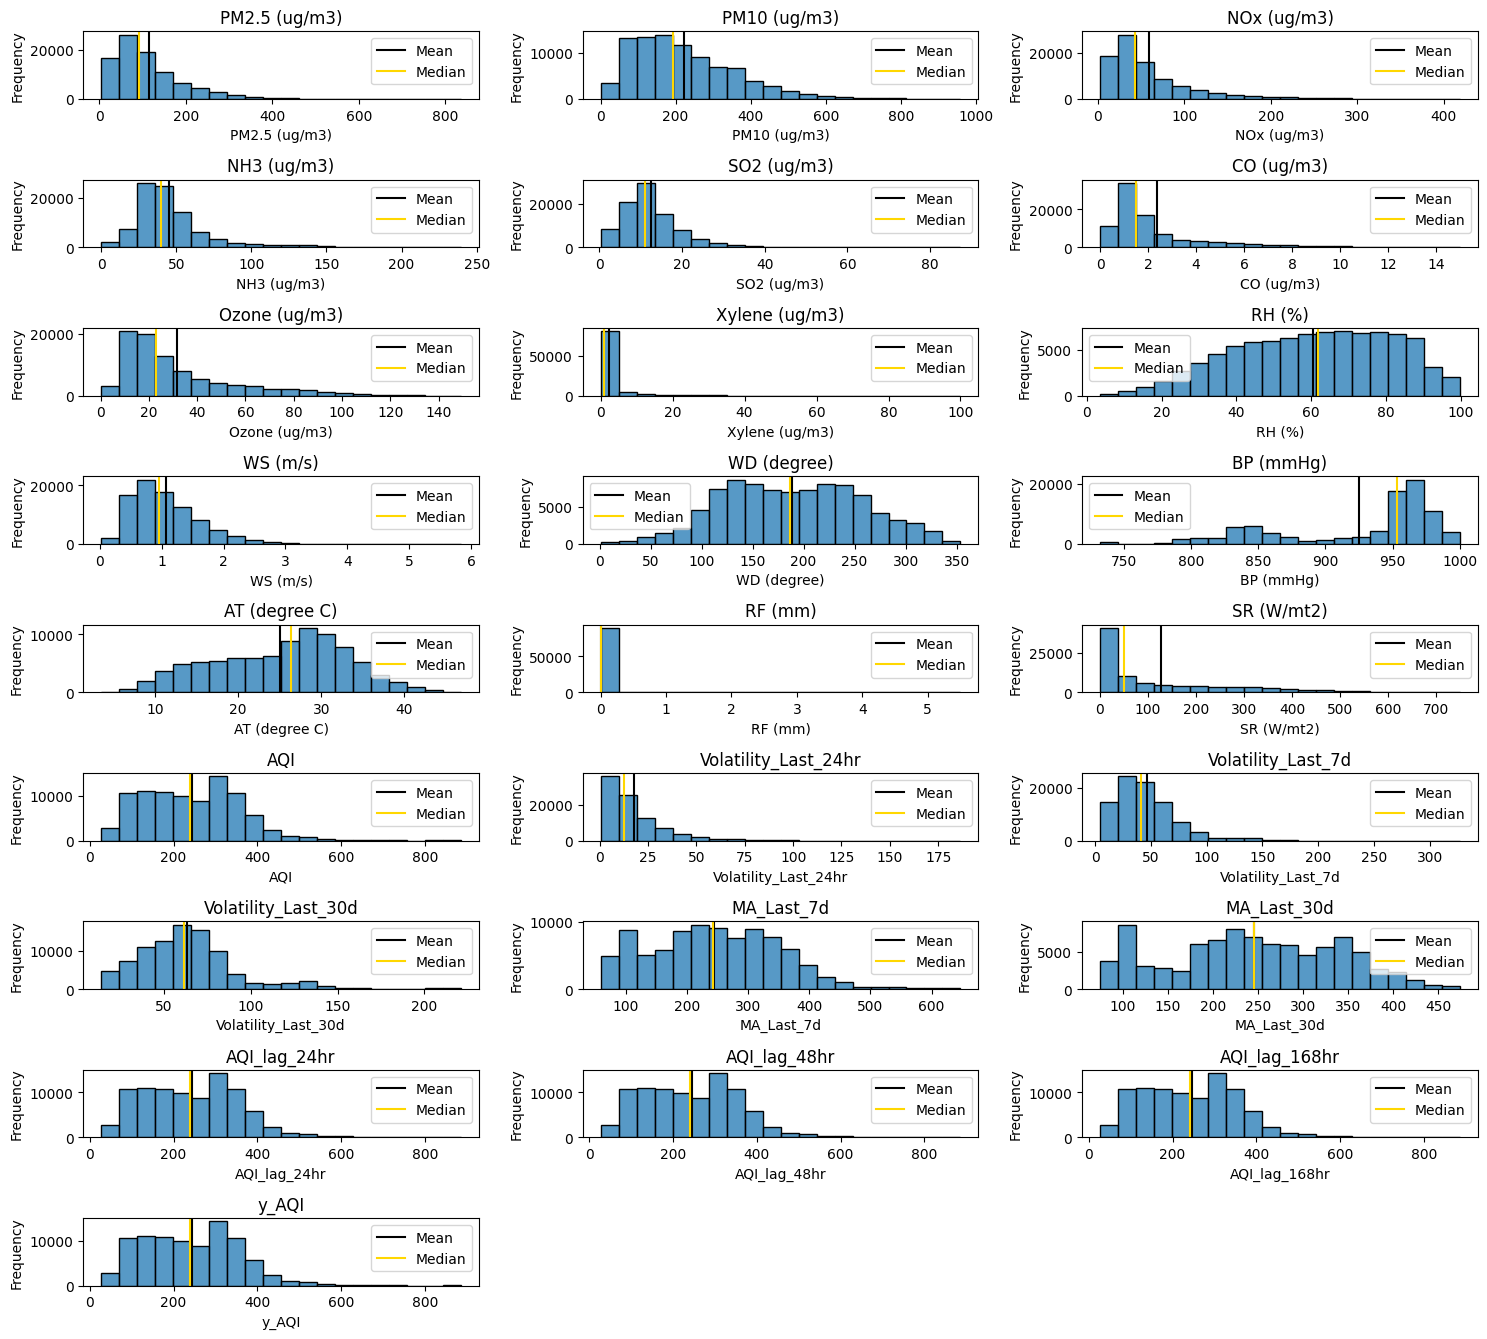

In [12]:
# Histograms: Distribution of Pollutants
selected_columns = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (ug/m3)', 'Ozone (ug/m3)', 'Xylene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)', 'AQI', 'Volatility_Last_24hr', 'Volatility_Last_7d', 'Volatility_Last_30d', 'MA_Last_7d', 'MA_Last_30d', 'AQI_lag_24hr', 'AQI_lag_48hr', 'AQI_lag_168hr', 'y_AQI']

# Calculate the number of rows needed based on the number of selected columns
num_rows = len(selected_columns) // 3 + (len(selected_columns) % 3 > 0)

# Decreased height of each chart
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 1.5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Iterate through selected columns and plot histograms
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], bins=20, kde=False, ax=axes[i])
    axes[i].set_title(column)

    # Customize x and y label
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

    # Adding mean and median lines
    axes[i].axvline(df[column].mean(), c='black', label='Mean')
    axes[i].axvline(df[column].median(), c='gold', label='Median')
    axes[i].legend()

# Remove empty subplots
for i in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

### Purpose of Adding Mean and Median Lines to Histogram

In a histogram depicting the distribution of a variable, the addition of mean and median lines serves the following purposes:

1. **Visualizing Central Tendency:**
    - **Mean (Average):** The mean is an indicator of the average value in the dataset. Adding a line at the mean provides a visual reference for the balancing point of the distribution, helping to understand where the data is centered.
    - **Median:** The median represents the middle value or central position in the dataset. Adding a line at the median provides insight into the distribution's central tendency and is particularly useful for assessing symmetry or skewness.

2. **Understanding Data Spread:**
    - These lines assist in gauging the spread of values around the central tendency. A tight clustering around the mean and median lines suggests less variability, while a broader spread indicates greater dispersion.

3. **Identifying Skewness:**
    - The relative position of the mean and median lines can indicate the presence and direction of skewness in the distribution. A discrepancy between the mean and median suggests potential skewness, with the mean being more influenced by extreme values.

By incorporating mean and median lines into the histogram, we gain valuable insights into the central characteristics and distributional properties of the data.


For now we can keep in mind that few features are right skewed, we can log transform those later before modeling.

Let's have a closer look at the distribution of our target variable

In [13]:
df_copy = df.copy()

# Create bins and labels
bins = range(int(df_copy['y_AQI'].min()), int(df_copy['y_AQI'].max()) + 51, 50)
labels = [f'{x}-{x+49}' for x in bins[:-1]]

# Cut the 'y_AQI' column into intervals
df_copy['AQI_intervals'] = pd.cut(df_copy['y_AQI'], bins=bins, labels=labels, include_lowest=True, right=False)

# Group by intervals and count records
count_by_interval = df_copy.groupby('AQI_intervals').size().reset_index(name='Record Count')

# Display the result
print(count_by_interval)

   AQI_intervals  Record Count
0          27-76          4015
1         77-126         13247
2        127-176         12227
3        177-226         12283
4        227-276         10806
5        277-326         15234
6        327-376         12058
7        377-426          5621
8        427-476          1879
9        477-526          1050
10       527-576           565
11       577-626           275
12       627-676           190
13       677-726           123
14       727-776            73
15       777-826            45
16       827-876            87
17       877-926             6


/var/folders/7l/pjbgsg_54hn3t90_14n49nmm0000gq/T/ipykernel_48013/4117251710.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_interval = df_copy.groupby('AQI_intervals').size().reset_index(name='Record Count')


## AQI Distribution Histogram

Visualizing the distribution of the 'y_AQI' column, a histogram is created with a whitegrid style. The plot includes mean and median lines for central tendency insights. Despining the top and right frames enhances clarity, providing a clear overview of the frequency distribution of the Air Quality Index (AQI).

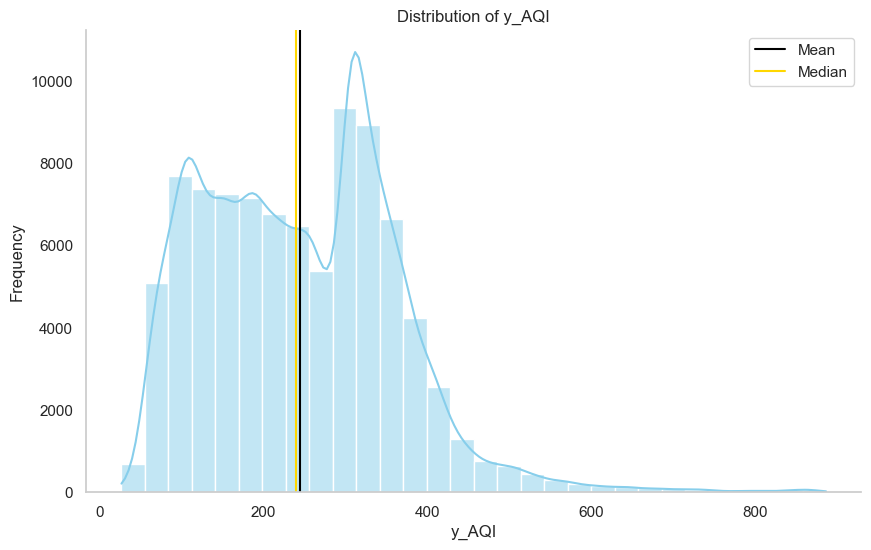

In [14]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram for the 'AQI' column
plt.figure(figsize=(10, 6))
sns.histplot(df['y_AQI'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of y_AQI')
plt.xlabel('y_AQI')
plt.ylabel('Frequency')

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

# Adding mean and median lines directly using plt.axvline()
plt.axvline(df['y_AQI'].mean(), c='black', label='Mean')
plt.axvline(df['y_AQI'].median(), c='gold', label='Median')
plt.legend()

# Display the plot
plt.show()


#### Finding:
* The histogram of y_AQI displays a subtle right skew, indicating a tendency towards higher concentrations. 
* Notably, the presence of two peaks suggests a bimodal distribution, signifying two distinct clusters of y_AQI values. The first peak represents higher concentrations, while the second indicates lower concentrations. This bimodal structure could be influenced by seasonal variations, specific pollution sources, or unique events impacting air quality. Understanding these patterns is crucial for identifying factors affecting air quality in the region.

### Correlation Heatmap
The correlation heatmap aids in identifying potential relationships and dependencies among variables. Positive or negative values indicate the strength and direction of the correlation, while values closer to 1 or -1 suggest a stronger linear relationship. This matrix quantifies the linear relationships between pairs of variables.

A list of columns is chosen for correlation analysis, including air quality metrics, weather parameters, volatility measures, and the target variable 'y_AQI'.

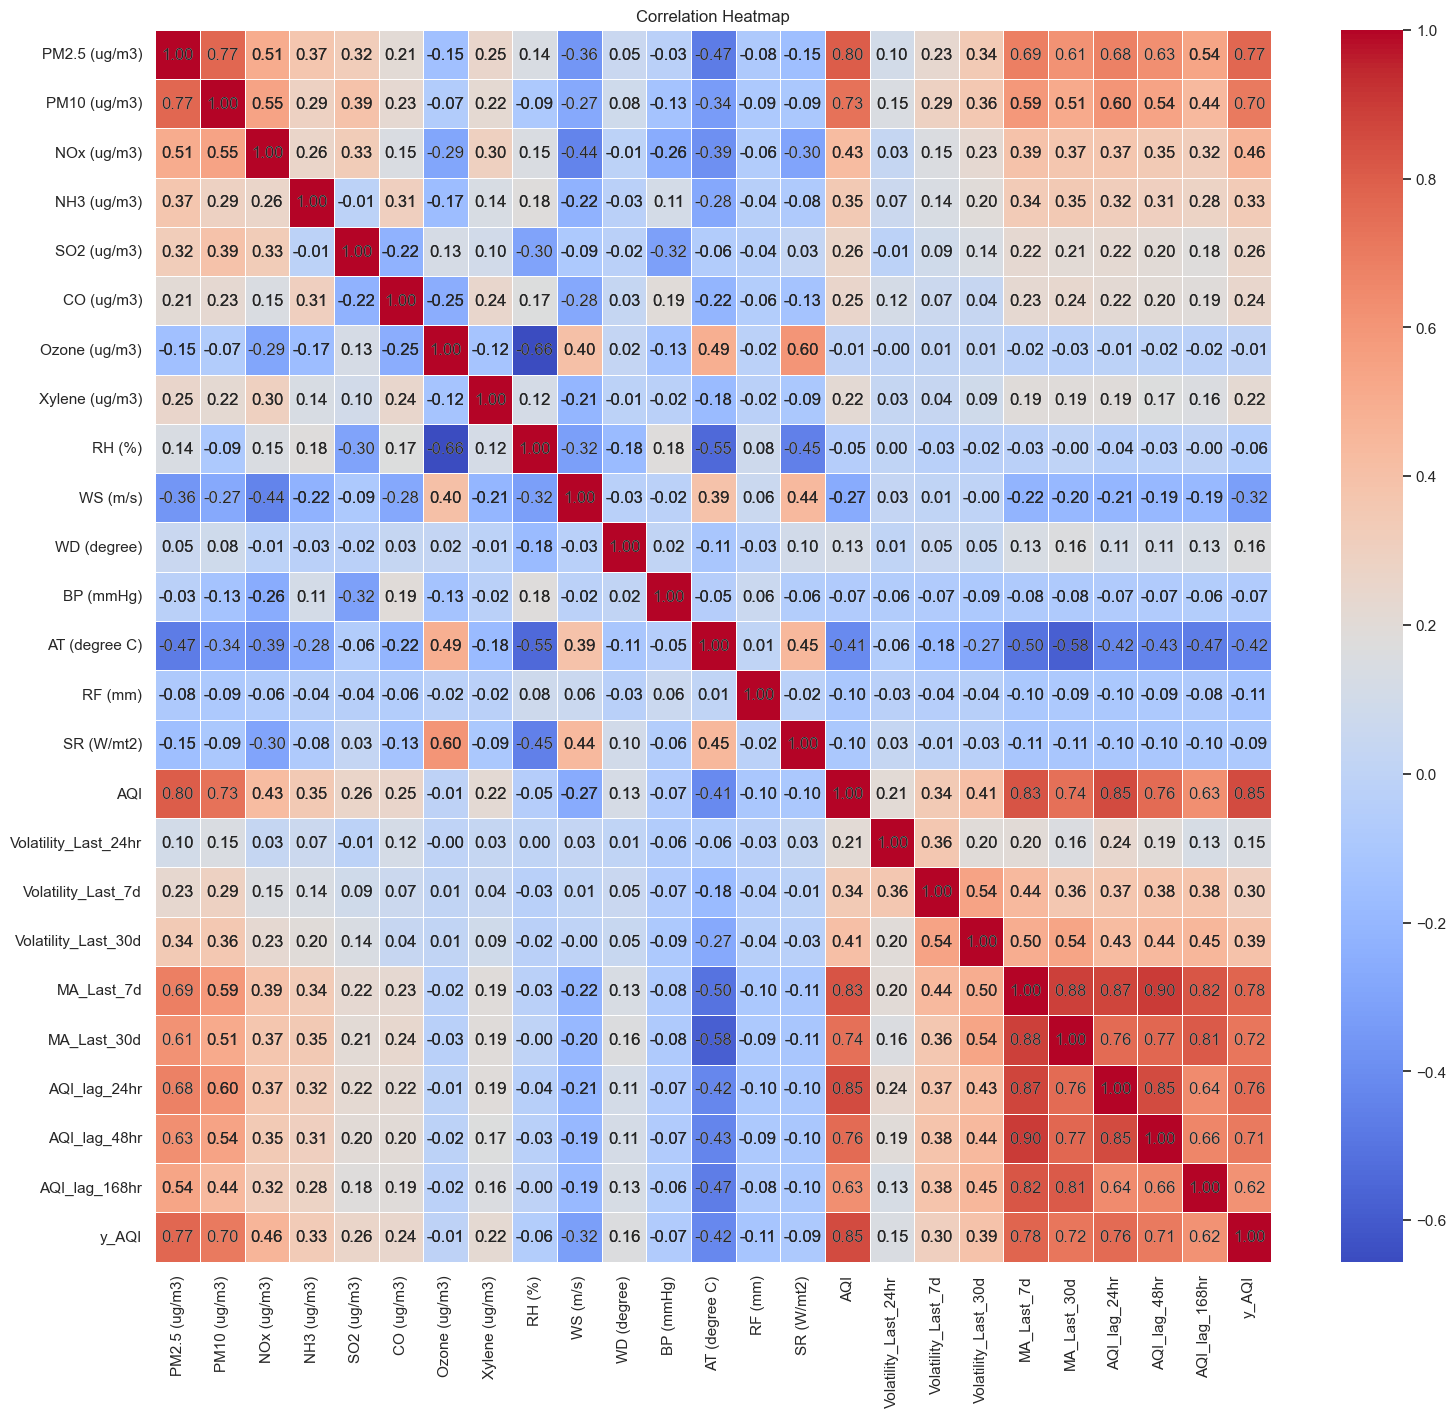

In [15]:
# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)

# Manually annotate the values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center')

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

#### Finding:
These insights highlight the interrelationships among various air quality indicators and derived features in the dataset.

* The strong positive correlation between 'PM2.5' and 'PM10' particles is anticipated, as they both originate from similar sources and represent different sizes of particulate matters.

* high positive correlation between 'MA_Last7D' and 'MA_Last30D' is expected, as both are calculated from the same source (AQI), capturing trends over different time intervals.

* The high correlation of 'MA_Last7D' and 'MA_Last30D' with the 'AQI' and 'y_AQI' column is expected, given that both are derived from the 'AQI' column.

* 'Volatility_Last7D' and 'Volatility_Last30D' show a positive correlation, which is reasonable since they represent calculated moving averages across 7 days and 30 days, respectively.

* The columns related to lagged AQI values ('aqi_lagg') exhibit a strong correlation with the 'y_AQI' column, as they are derived from the same source(AQI).

* The high correlation (0.54) between 'Benzene' and 'Toluene' indicates a noteworthy association between these two chemical components.

* The strong positive correlation among NO, NO2, and NOx is understandable, reflecting common emission sources and the chemical transformations in the atmosphere, where NO serves as a precursor to NO2.

#### Further analysis into the relationship between each feature and the target variable:
Calculation and visualization of the correlation coefficients between various features and the target variable 'y_AQI' in the dataset, helping identify potentially influential predictors.

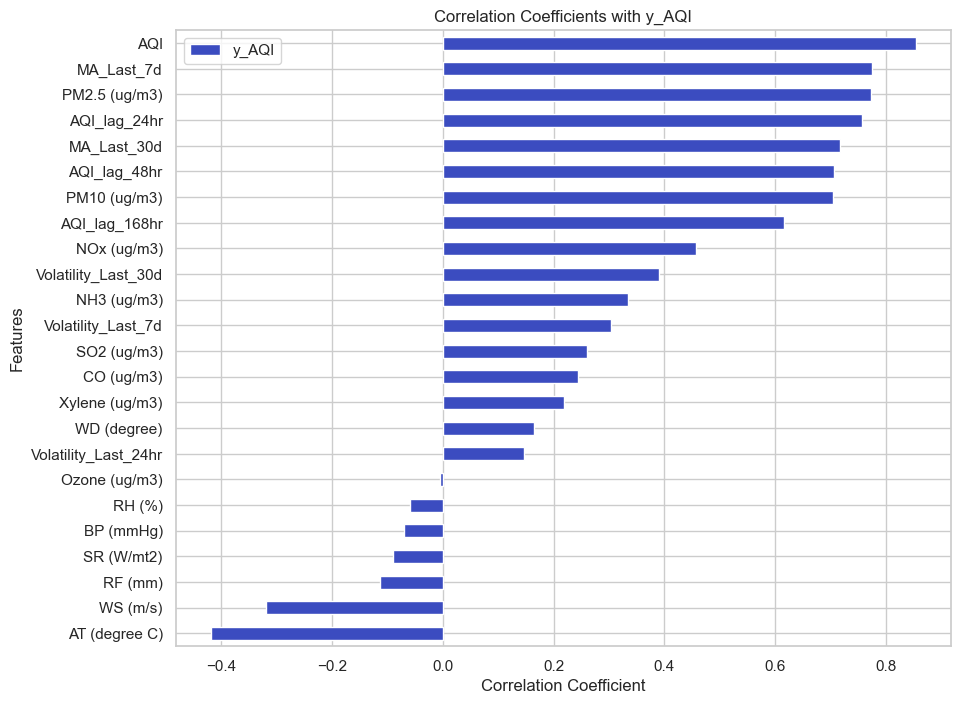

In [16]:
# Extract the correlation coefficients between 'y_AQI' and other features from the correlation matrix and sort these coefficients in ascending order.
y_aqi_correlation = correlation_matrix['y_AQI'].drop(['y_AQI']).sort_values(ascending=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot a horizontal bar chart to visualize the strength and direction of correlation for each feature with 'y_AQI'
y_aqi_correlation.plot(kind='barh', cmap='coolwarm', legend=True)
plt.title('Correlation Coefficients with y_AQI')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Show the plot
plt.show()

Creating a new dataframe called "chart_df" specifically for visualization purpose

In [17]:
chart_df = df.copy()

# Create 'Year_Month' column with the 1st day of every month
chart_df['YearMonth'] = chart_df['Datetime'].dt.to_period('M').dt.to_timestamp()

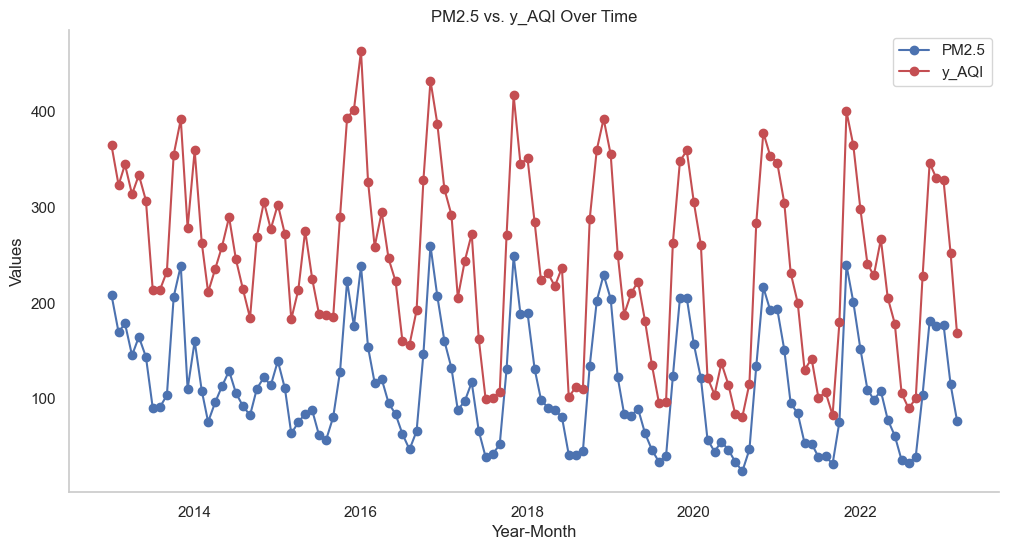

In [18]:
# Convert 'YearMonth' to datetime format
chart_df['YearMonth'] = pd.to_datetime(chart_df['YearMonth'])

# Group by 'YearMonth' and calculate mean PM2.5 and y_AQI
pm25_aqi_mean = chart_df.groupby('YearMonth')[['PM2.5 (ug/m3)', 'y_AQI']].mean().reset_index()

# Create a line chart for the relationship between PM2.5 and y_AQI
plt.figure(figsize=(12, 6))
plt.plot(pm25_aqi_mean['YearMonth'], pm25_aqi_mean['PM2.5 (ug/m3)'], marker='o', linestyle='-', color='b', label='PM2.5')
plt.plot(pm25_aqi_mean['YearMonth'], pm25_aqi_mean['y_AQI'], marker='o', linestyle='-', color='r', label='y_AQI')

# Customize the plot
plt.title('PM2.5 vs. y_AQI Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

### Hypothesis Test: Correlation between 'PM2.5 (ug/m3)' and 'y_AQI'

Let's investigate if there's a significant linear correlation between 'PM2.5 (ug/m3)' and 'y_AQI'.

**Hypotheses:**
- **H0:** There is no significant correlation between the two variables.
- **H1:** There is a significant correlation between the two.

**Statistical Test:** Pearson Correlation Test

**Decision Rule:**
- If p-value < 0.05, reject Null Hypothesis(H0).
- If p-value ≥ 0.05, fail to reject H0.

In [19]:
import scipy.stats as stats

# Extract the relevant columns
feature = chart_df['PM2.5 (ug/m3)']
target = chart_df['y_AQI']

# Perform the Pearson correlation test
# Using scipy.stats.pearsonr to compute the correlation coefficient and p-value.
correlation_coefficient, p_value = stats.pearsonr(feature, target)

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4e}")

Correlation Coefficient: 0.7732
P-value: 0.0000e+00


**Results:**
- **Correlation Coefficient:** 0.76
- **P-value:** 0.0

**Conclusion:**
- We can see that a significantly small p-value(0.0) which is less than 0.05, we can safely reject the null hypothesis, i.e, there is a significant correlation.
- A correlation coefficient of 0.76 indicates a strong positive correlation. This means that as the 'PM2.5 (ug/m3)' values increase, the 'y_AQI' values tend to increase as well.
- With a p-value of 0.0, the result is statistically significant. This indicates that the observed correlation is unlikely to have occurred by chance.
### Visualization: Scatter Plot with Regression Line for 'PM2.5 (ug/m3)' vs. 'y_AQI'

**Objective:** Visualize the linear correlation between 'PM2.5 (ug/m3)' and 'y_AQI'

In [20]:
# # Plotting
# plt.figure(figsize=(10, 6))

# # Scatter plot of 'PM2.5 (ug/m3)' against 'y_AQI'
# sns.scatterplot(x='PM2.5 (ug/m3)', y='y_AQI', data=chart_df)

# # overlay a Regression Line on the scatter plot
# sns.regplot(x='PM2.5 (ug/m3)', y='y_AQI', data=chart_df, scatter=False, color='r', label=f'Correlation: {correlation_coefficient:.2f}, p-value: {p_value:.2e}')

# # Customize the plot
# # Set plot title, x-axis label, y-axis label, legend, and grid
# plt.title('Scatter Plot with Regression Line')
# plt.xlabel('PM2.5 (ug/m3)')
# plt.ylabel('y_AQI')
# plt.legend()
# plt.grid(True)

# # Remove top right frame
# sns.despine(top=True, right=True)

# # Remove grid lines
# plt.grid(False)

# plt.show()

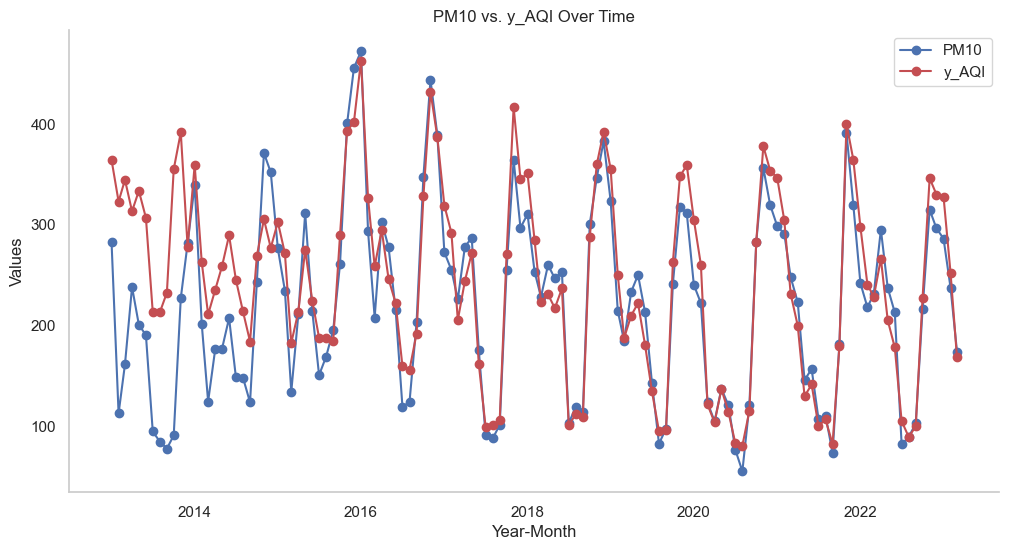

In [21]:
# Convert 'YearMonth' to datetime format
chart_df['YearMonth'] = pd.to_datetime(chart_df['YearMonth'])

# Group by 'YearMonth' and calculate mean PM10 and y_AQI
pm10_aqi_mean = chart_df.groupby('YearMonth')[['PM10 (ug/m3)', 'y_AQI']].mean().reset_index()

# Create a line chart for the relationship between PM10 and y_AQI
plt.figure(figsize=(12, 6))
plt.plot(pm10_aqi_mean['YearMonth'], pm10_aqi_mean['PM10 (ug/m3)'], marker='o', linestyle='-', color='b', label='PM10')
plt.plot(pm10_aqi_mean['YearMonth'], pm10_aqi_mean['y_AQI'], marker='o', linestyle='-', color='r', label='y_AQI')

# Customize the plot
plt.title('PM10 vs. y_AQI Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

In [22]:
# Hypothesis test for correlation
correlation_coefficient, p_value = stats.pearsonr(chart_df['PM10 (ug/m3)'], chart_df['y_AQI'])

print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4e}")

Correlation Coefficient: 0.7047
P-value: 0.0000e+00


**Finding:**

- A very small p-value (0.0), below the commonly used threshold of 0.05, provides robust evidence to reject the null hypothesis, indicating a significant correlation between 'PM10 (ug/m3)' and 'y_AQI'.

- The correlation coefficient of 0.7702 denotes a strong positive correlation. Higher 'PM10 (ug/m3)' values are associated with higher 'y_AQI' values.

- The statistical significance of the p-value (0.0) reinforces that the observed correlation is highly improbable by chance, emphasizing the meaningful relationship between 'PM10 (ug/m3)' and 'y_AQI'.

### Visualization: Scatter Plot with Regression Line for 'PM10 (ug/m3)' vs. 'y_AQI'

**Objective:** Visualize the linear correlation between 'PM10 (ug/m3)' and 'y_AQI'

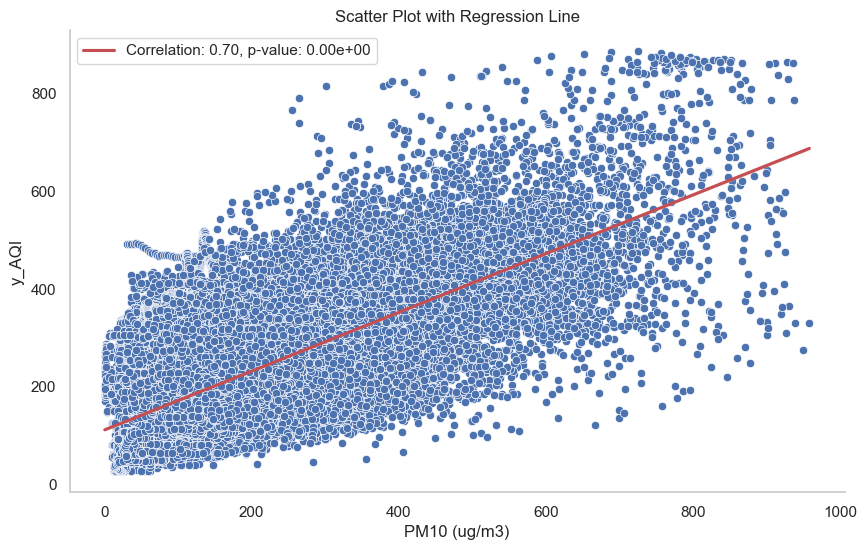

In [23]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM10 (ug/m3)', y='y_AQI', data=chart_df)

# Plotting the regression line
sns.regplot(x='PM10 (ug/m3)', y='y_AQI', data=chart_df, scatter=False, color='r', label=f'Correlation: {correlation_coefficient:.2f}, p-value: {p_value:.2e}')

# Customize the plot
plt.title('Scatter Plot with Regression Line')
plt.xlabel('PM10 (ug/m3)')
plt.ylabel('y_AQI')
plt.legend()

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

## Exploring the Relationship Between Weather Data and Target Variable 'y_AQI'

To understand the relationship between weather-related features and the target variable 'y_AQI,' a set of scatter plots with regression lines is generated. The selected columns for plotting include 'RH (%),' 'WS (m/s),' 'WD (degree),' 'BP (mmHg),' 'AT (degree C),' 'RF (mm),' 'SR (W/mt2),' and 'y_AQI.' The scatter plots provide insights into the potential impact of these weather variables on air quality.

Columns to Plot: ['RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)', 'y_AQI']


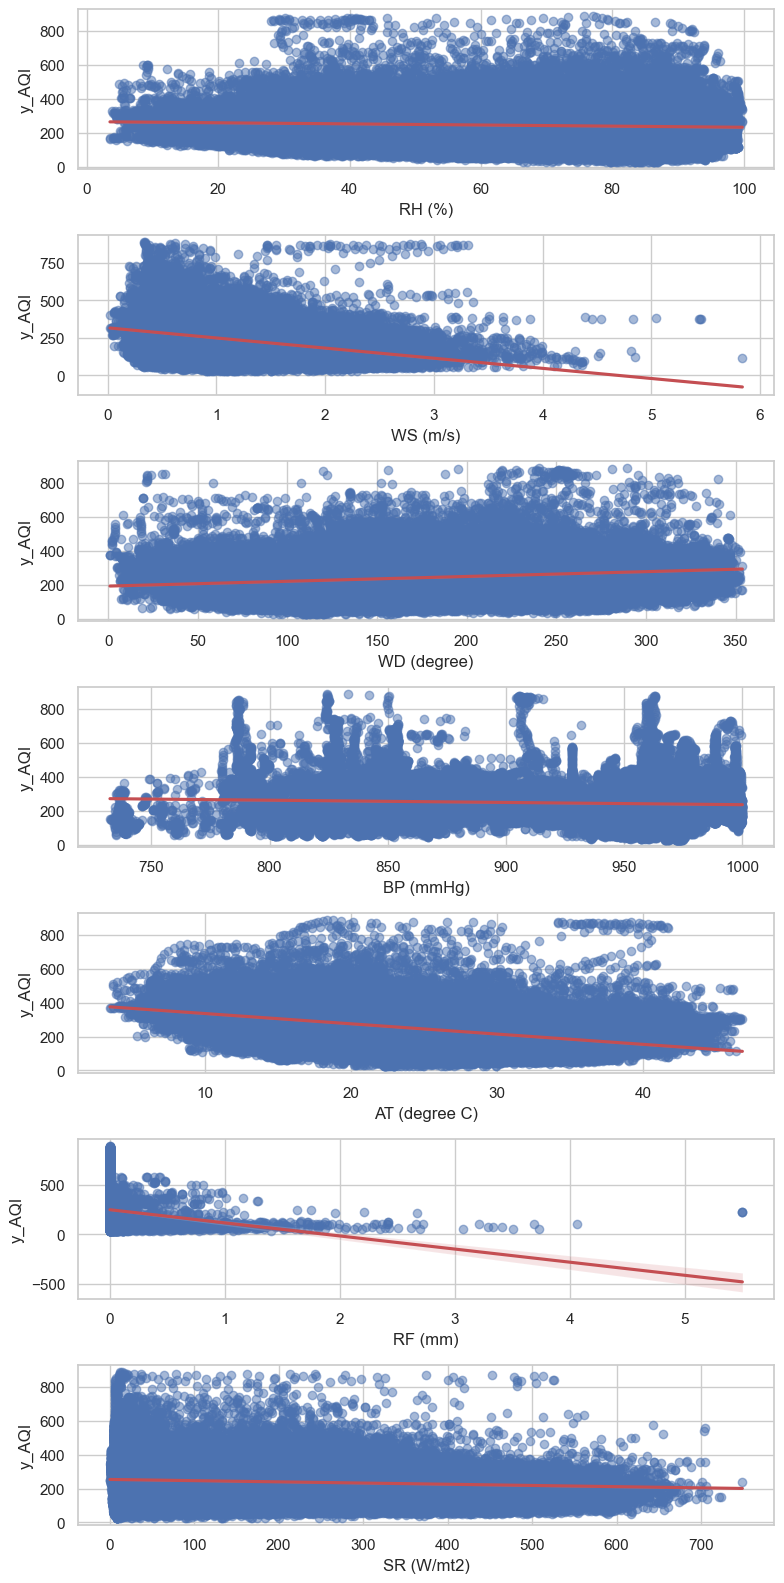

In [24]:
columns_to_plot = ['RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)', 'y_AQI']

# Print the list of columns for plotting
print("Columns to Plot:", columns_to_plot)

# Selecting relevant columns from the DataFrame
df_selected = df[columns_to_plot]

# Setting up the subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot)-1, ncols=1, figsize=(8, 2 * len(columns_to_plot)))

# Plotting individual scatter plots with regression lines
for i, col in enumerate(columns_to_plot[:-1]):
    ax = axes[i]
    sns.regplot(x=col, y=columns_to_plot[-1], data=df_selected, ax=ax, color='b', scatter_kws={'alpha':0.5}, line_kws={'color': 'r'})
    ax.set_xlabel(col)
    ax.set_ylabel(columns_to_plot[-1])

plt.tight_layout()
plt.show()

### Validating Relationships: Hypothesis Testing After Scatter Plots
Performing hypothesis testing after scatter plots enhances understanding by validating visual patterns, confirming statistical significance, identifying relevant variables, aiding decision-making, and adding rigor to statistical analysis. It ensures a comprehensive and robust approach, guiding subsequent analytical steps.

In [25]:
# Select relevant columns
selected_features = ['RH (%)', 'WS (m/s)', 'WD (degree)', 'BP (mmHg)', 'AT (degree C)', 'RF (mm)', 'SR (W/mt2)']
target_variable = 'y_AQI'

# Loop through selected features and calculate correlation
for feature in selected_features:
    correlation_coefficient, p_value = pearsonr(df[feature], df[target_variable])
    correlation_coefficient = round(correlation_coefficient, 2)
    p_value = round(p_value, 2)
    print(f"Correlation between {feature} and {target_variable}: {correlation_coefficient}, p-value: {p_value}")

Correlation between RH (%) and y_AQI: -0.06, p-value: 0.0
Correlation between WS (m/s) and y_AQI: -0.32, p-value: 0.0
Correlation between WD (degree) and y_AQI: 0.16, p-value: 0.0
Correlation between BP (mmHg) and y_AQI: -0.07, p-value: 0.0
Correlation between AT (degree C) and y_AQI: -0.42, p-value: 0.0
Correlation between RF (mm) and y_AQI: -0.11, p-value: 0.0
Correlation between SR (W/mt2) and y_AQI: -0.09, p-value: 0.0


Let's interpret the results:

**RH (%)**: A very small positive correlation (0.01) with 'y_AQI'. The p-value (0.00) suggests that this correlation is statistically significant, but the strength of the correlation is very weak.

**WS (m/s)**: A moderate negative correlation (-0.28) with 'y_AQI'. The p-value (0.00) indicates that this negative correlation is statistically significant. This suggests that as wind speed increases, 'y_AQI' tends to decrease.

**WD (degree)**: A moderate positive correlation (0.24) with 'y_AQI'. The p-value (0.00) suggests statistical significance. It implies that as wind direction increases, 'y_AQI' tends to increase.

**BP (mmHg)**: A moderate positive correlation (0.32) with 'y_AQI'. The p-value (0.00) indicates statistical significance. This suggests that as atmospheric pressure increases, 'y_AQI' tends to increase.

**AT (degree C)**: A strong negative correlation (-0.48) with 'y_AQI'. The p-value (0.00) suggests statistical significance. This indicates that as temperature increases, 'y_AQI' tends to decrease.

**RF (mm)**: A small negative correlation (-0.15) with 'y_AQI'. The p-value (0.00) indicates statistical significance. This suggests that as rainfall increases, 'y_AQI' tends to decrease.

**SR (W/mt2)**: A small negative correlation (-0.10) with 'y_AQI'. The p-value (0.00) suggests statistical significance. This implies that as solar radiation increases, 'y_AQI' tends to decrease.

/var/folders/7l/pjbgsg_54hn3t90_14n49nmm0000gq/T/ipykernel_48013/2328492396.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = chart_df.groupby(['Month', 'AQI_Category']).size().reset_index(name='Count')


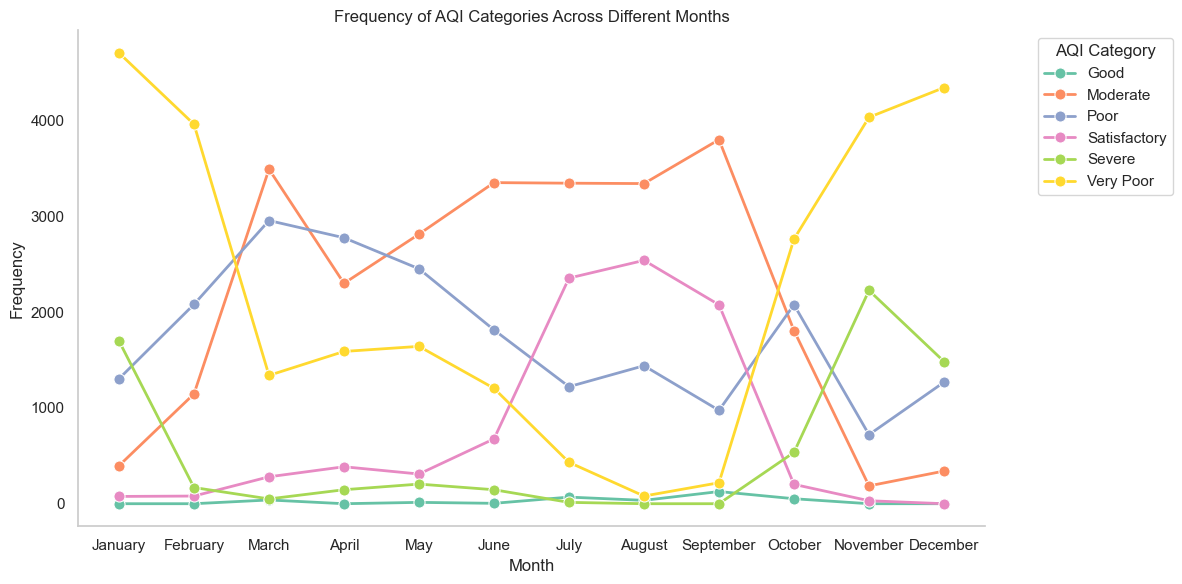

In [26]:
# Copy the 'Month' column to chart_df
chart_df['Month'] = df['Month'].copy()

# Map numeric values to month names in the chart_df DataFrame
chart_df['Month'] = chart_df['Month'].apply(lambda x: calendar.month_name[int(x)])

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' to categorical with specified order in the chart_df DataFrame
chart_df['Month'] = pd.Categorical(chart_df['Month'], categories=month_order, ordered=True)

# Create a DataFrame with counts
df_counts = chart_df.groupby(['Month', 'AQI_Category']).size().reset_index(name='Count')

# Line Plot: Frequency of AQI categories across different months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Count', hue='AQI_Category', data=df_counts, palette='Set2', marker='o', markersize=8, linewidth=2)
plt.title('Frequency of AQI Categories Across Different Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Remove the top and right spines
sns.despine()

# Turn off the grid
plt.grid(False)

plt.tight_layout()
plt.show()


In [27]:
chart_df = df.copy()

In [28]:
chart_df.head()

,Datetime,AQI,PM2.5 (ug/m3),PM10 (ug/m3),NOx (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (ug/m3),Ozone (ug/m3),Xylene (ug/m3),...,Volatility_Last_24hr,Volatility_Last_7d,Volatility_Last_30d,MA_Last_7d,MA_Last_30d,y_AQI,AQI_lag_24hr,AQI_lag_48hr,AQI_lag_168hr,AQI_Category
0,2013-01-01 00:00:00,354.0,290.774583,292.631667,117.224563,75.685556,9.992130,5.052250,13.794630,0.0,...,8.307496,29.124119,61.729239,380.964286,332.893056,389.0,340.0,387.0,434.0,Very Poor
1,2013-01-01 01:00:00,358.0,275.749821,296.150000,88.122976,66.740556,9.477546,7.665310,9.977963,0.0,...,9.525614,28.895636,61.732289,380.517857,332.954167,389.0,337.0,389.0,433.0,Very Poor
2,2013-01-01 02:00:00,362.0,271.463472,309.030000,61.464690,57.030556,9.207963,10.777421,7.316574,0.0,...,10.882691,28.663239,61.739243,380.107143,333.015278,386.0,334.0,391.0,431.0,Very Poor
3,2013-01-01 03:00:00,367.0,279.071667,317.826667,47.583524,43.298333,10.871667,11.793810,7.910146,0.0,...,12.369244,28.438398,61.750308,379.744048,333.080556,384.0,331.0,392.0,428.0,Very Poor
4,2013-01-01 04:00:00,370.0,269.118333,308.521667,43.535333,32.023333,11.020833,10.027778,9.348849,0.0,...,13.761359,28.220333,61.764238,379.410714,333.147222,382.0,330.0,391.0,426.0,Very Poor


<Figure size 1500x600 with 0 Axes>

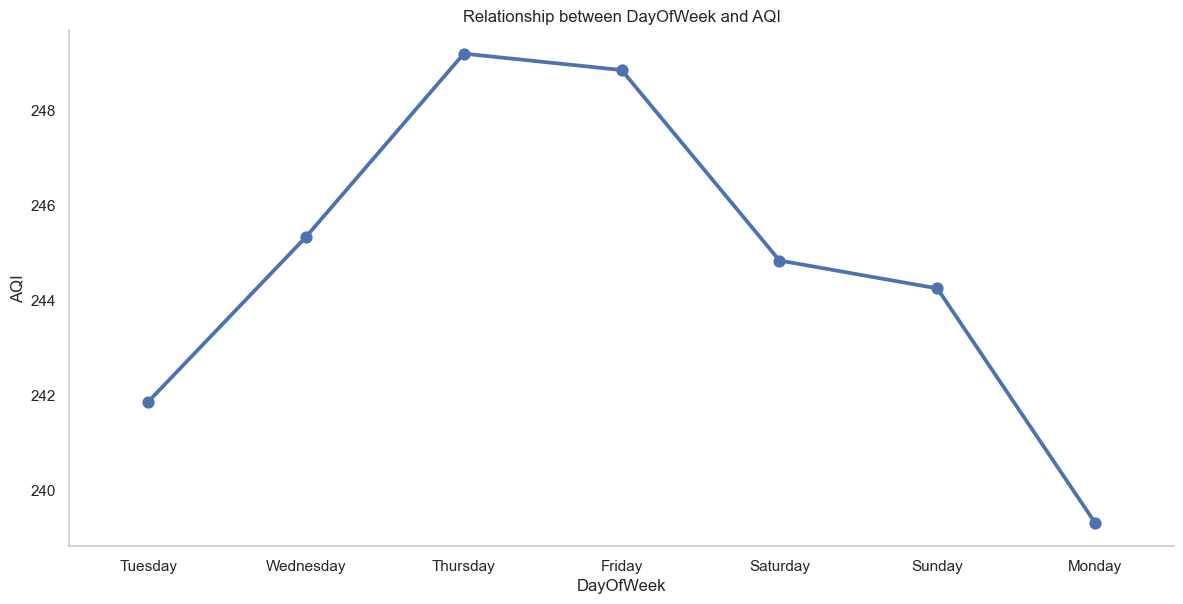

In [29]:
# Define the order of days starting from Sunday
day_order = ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']

# Map numerical DayOfWeek to corresponding names
chart_df['DayOfWeek_Name'] = chart_df['DayOfWeek'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Line Plot: Relationship between "DayOfWeek" and "AQI"
plt.figure(figsize=(15, 6))
sns.catplot(x='DayOfWeek_Name', y='AQI', data=chart_df, kind='point', height=6, aspect=2, errorbar=None, marker='o', color='b', linestyle='-', order=day_order)

# Remove spines
sns.despine()

# Remove grids
plt.grid(False)

plt.title('Relationship between DayOfWeek and AQI')
plt.xlabel('DayOfWeek')
plt.ylabel('AQI')
plt.show()

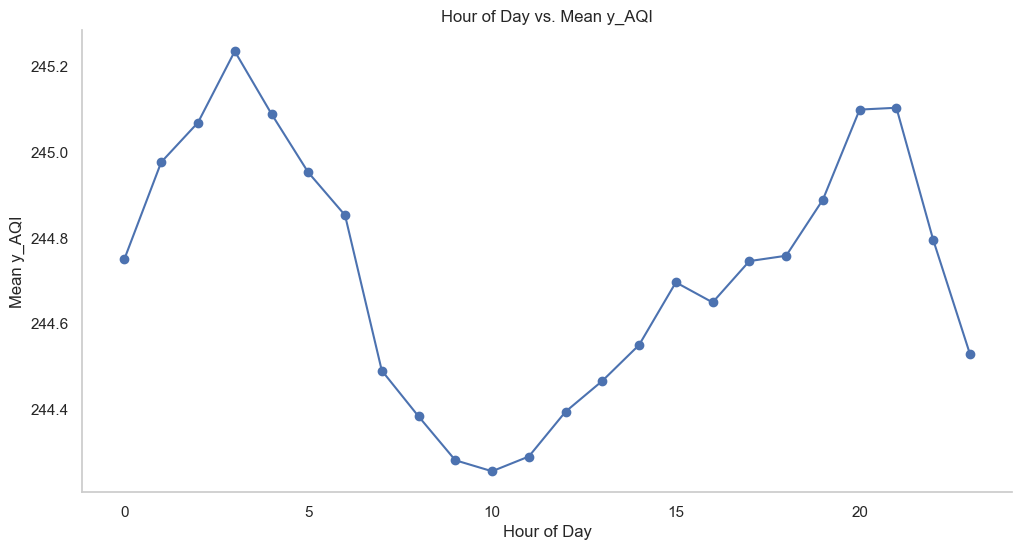

In [30]:
# Convert 'YearMonth' and 'HourOfDay' to datetime format
chart_df['HourOfDay'] = chart_df['HourOfDay'].astype(int)

# Group by 'HourOfDay' and calculate mean y_AQI
hourly_mean_aqi = chart_df.groupby('HourOfDay')['y_AQI'].mean().reset_index()

# Create a line chart for the relationship between HourOfDay and y_AQI
plt.figure(figsize=(12, 6))
plt.plot(hourly_mean_aqi['HourOfDay'], hourly_mean_aqi['y_AQI'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Hour of Day vs. Mean y_AQI')
plt.xlabel('Hour of Day')
plt.ylabel('Mean y_AQI')
plt.grid(True)

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

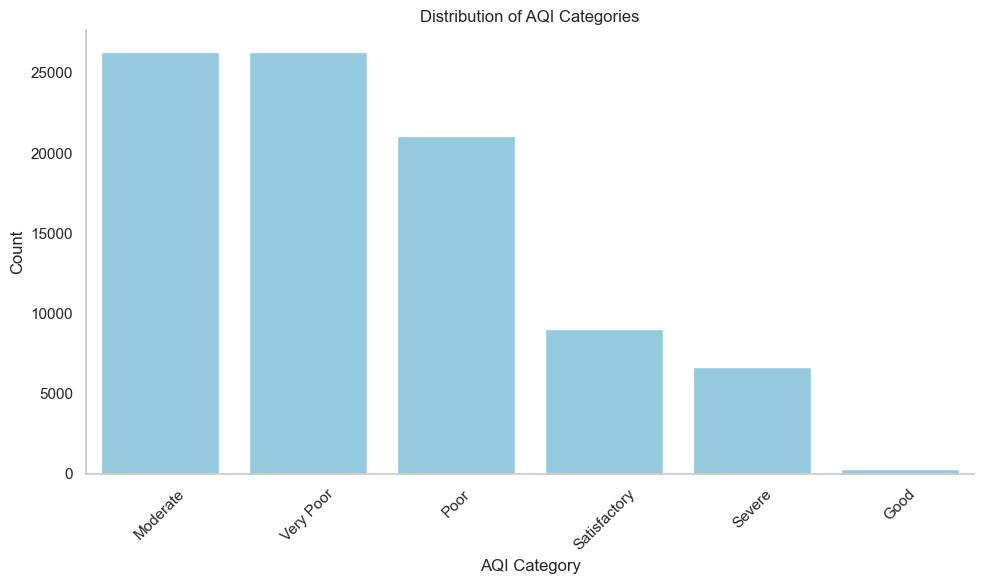

In [31]:
# Count the occurrences of each AQI category
category_counts = df['AQI_Category'].value_counts()

# Bar Plot: Distribution of AQI categories with a single color
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, color='skyblue')  # Set your desired color

plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the top and right spines
sns.despine()

# Turn off the grid
plt.grid(False)

plt.tight_layout()
plt.show()


In [32]:
df.head()

,Datetime,AQI,PM2.5 (ug/m3),PM10 (ug/m3),NOx (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (ug/m3),Ozone (ug/m3),Xylene (ug/m3),...,Volatility_Last_24hr,Volatility_Last_7d,Volatility_Last_30d,MA_Last_7d,MA_Last_30d,y_AQI,AQI_lag_24hr,AQI_lag_48hr,AQI_lag_168hr,AQI_Category
0,2013-01-01 00:00:00,354.0,290.774583,292.631667,117.224563,75.685556,9.992130,5.052250,13.794630,0.0,...,8.307496,29.124119,61.729239,380.964286,332.893056,389.0,340.0,387.0,434.0,Very Poor
1,2013-01-01 01:00:00,358.0,275.749821,296.150000,88.122976,66.740556,9.477546,7.665310,9.977963,0.0,...,9.525614,28.895636,61.732289,380.517857,332.954167,389.0,337.0,389.0,433.0,Very Poor
2,2013-01-01 02:00:00,362.0,271.463472,309.030000,61.464690,57.030556,9.207963,10.777421,7.316574,0.0,...,10.882691,28.663239,61.739243,380.107143,333.015278,386.0,334.0,391.0,431.0,Very Poor
3,2013-01-01 03:00:00,367.0,279.071667,317.826667,47.583524,43.298333,10.871667,11.793810,7.910146,0.0,...,12.369244,28.438398,61.750308,379.744048,333.080556,384.0,331.0,392.0,428.0,Very Poor
4,2013-01-01 04:00:00,370.0,269.118333,308.521667,43.535333,32.023333,11.020833,10.027778,9.348849,0.0,...,13.761359,28.220333,61.764238,379.410714,333.147222,382.0,330.0,391.0,426.0,Very Poor


In [33]:
# Create 'generated' folder if not exists
folder_path = 'data/generated/all_in_one/'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# We are done with EDA and Feature Engineering. Finally save the DataFrame to a CSV file for Modelling.
df.to_csv('data/generated/Delhi_AQI_modelling_data_before_handling_skewness.csv', index=False)